<a href="https://www.kaggle.com/code/lalit7881/ai-vs-human-detection-gb-xgboost-100?scriptVersionId=296445775" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ai-vs-human-content-detection-dataset-2026/ai_human_detection_v1.csv


## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/ai-vs-human-content-detection-dataset-2026/ai_human_detection_v1.csv")

In [3]:
df.head()

,id,text,human_or_ai,source_model,prompt,domain,language,edit_level,word_count,generation_date,version
0,e37e31c0-35d0-486d-9760-efadd4e0e289,Aprender programación en Python es fácil . Pri...,human,Human,NaN,Technical Blog,es,none,34,2026-01-29T08:38:18.272755,v1.0
1,68e294cf-a499-4fbf-8616-2d6324570be9,Error: 400 Client Error: Bad Request for url: ...,ai,gemma2-9b-it,Discute el papel de la tecnología en el aprend...,Education,es,none,9,2026-01-29T08:58:20.717225,v1.0
2,b5e06ef0-9758-471f-81dc-182c6117ee81,Error: 404 Client Error: Not Found for url: ht...,ai,gemma2-9b-itllama-3.3-70b-versatile,Create a cold outreach email for business part...,Email,en,none,9,2026-01-29T09:13:20.114765,v1.0
3,6177fc40-1567-445b-af15-f3250ddd3403,**Global Economic Trends: A Shifting Landscape...,ai,llama-3.1-8b-instant,Write about economic trends affecting global m...,News,en,none,558,2026-01-29T08:39:55.917663,v1.0
4,192a9615-ed51-4750-b649-d18f8882f555,"""Recuerda que tú eres fuerte, capaz y única. N...",ai,llama-3.1-8b-instant,Escribe una publicación inspiradora para redes...,Social Media,es,none,147,2026-01-29T08:42:52.451370,v1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               686 non-null    object
 1   text             686 non-null    object
 2   human_or_ai      686 non-null    object
 3   source_model     686 non-null    object
 4   prompt           505 non-null    object
 5   domain           686 non-null    object
 6   language         686 non-null    object
 7   edit_level       686 non-null    object
 8   word_count       686 non-null    int64 
 9   generation_date  686 non-null    object
 10  version          686 non-null    object
dtypes: int64(1), object(10)
memory usage: 59.1+ KB


In [5]:
df.describe()

,word_count
count,686.000000
mean,262.300292
std,203.517607
min,9.000000
25%,57.000000
50%,245.000000
75%,393.500000
max,1121.000000


In [6]:
df.isnull().sum()

id                   0
text                 0
human_or_ai          0
source_model         0
prompt             181
domain               0
language             0
edit_level           0
word_count           0
generation_date      0
version              0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.dtypes

id                 object
text               object
human_or_ai        object
source_model       object
prompt             object
domain             object
language           object
edit_level         object
word_count          int64
generation_date    object
version            object
dtype: object

In [9]:
df.shape

(686, 11)

In [10]:
df.nunique()

id                 686
text               686
human_or_ai          3
source_model         4
prompt             163
domain               6
language             7
edit_level           3
word_count         385
generation_date    686
version              1
dtype: int64

In [11]:
df.columns

Index(['id', 'text', 'human_or_ai', 'source_model', 'prompt', 'domain',
       'language', 'edit_level', 'word_count', 'generation_date', 'version'],
      dtype='object')

## Data visualizations

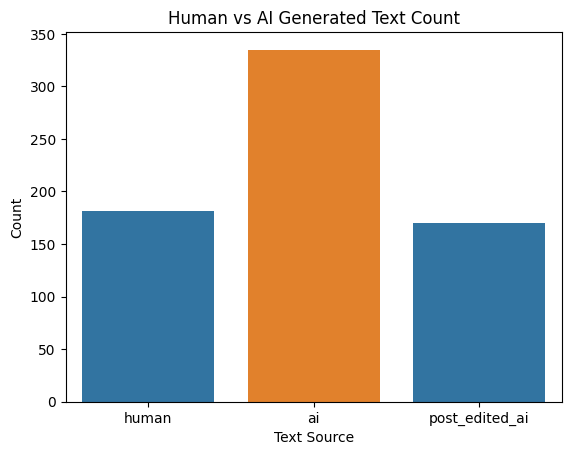

In [12]:
sns.countplot(
    data=df,
    x='human_or_ai',
    palette=['#1f77b4', '#ff7f0e']
)
plt.title('Human vs AI Generated Text Count')
plt.xlabel('Text Source')
plt.ylabel('Count')
plt.show()


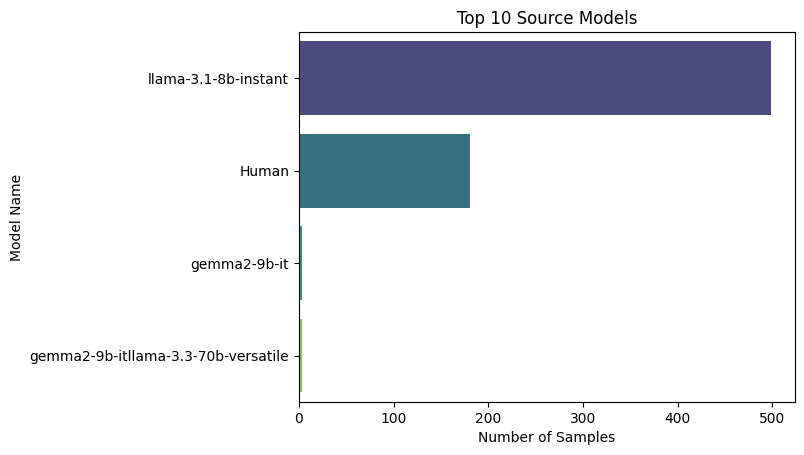

In [13]:
top_models = df['source_model'].value_counts().head(10)

sns.barplot(
    x=top_models.values,
    y=top_models.index,
    palette='viridis'
)
plt.title('Top 10 Source Models')
plt.xlabel('Number of Samples')
plt.ylabel('Model Name')
plt.show()


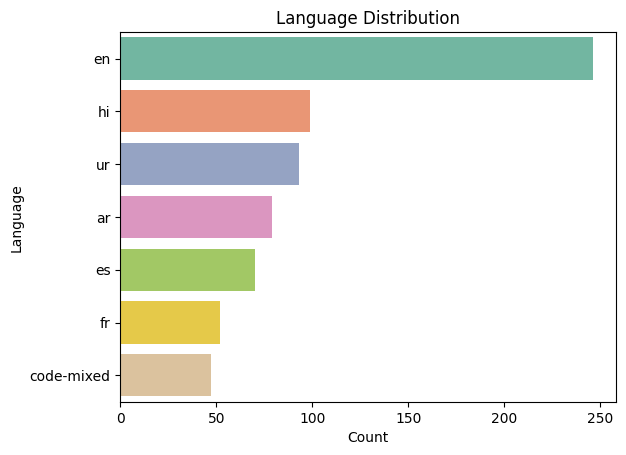

In [14]:
sns.countplot(
    data=df,
    y='language',
    order=df['language'].value_counts().index,
    palette='Set2'
)
plt.title('Language Distribution')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()


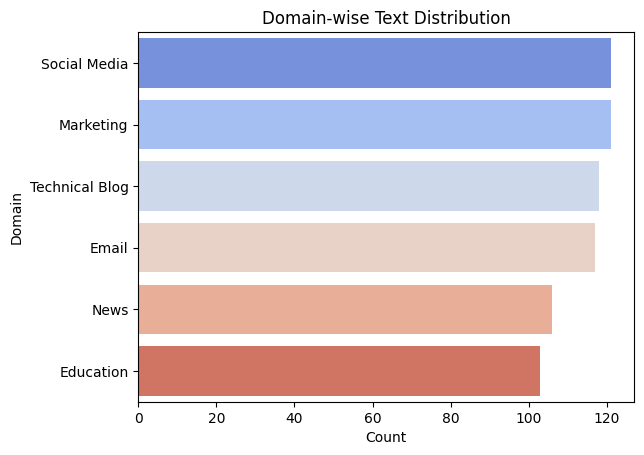

In [15]:
sns.countplot(
    data=df,
    y='domain',
    order=df['domain'].value_counts().index,
    palette='coolwarm'
)
plt.title('Domain-wise Text Distribution')
plt.xlabel('Count')
plt.ylabel('Domain')
plt.show()


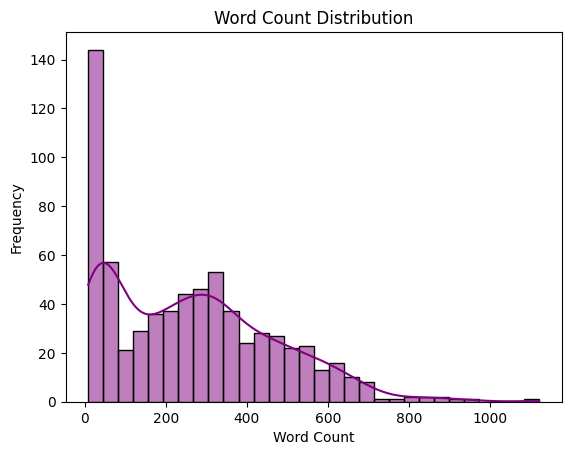

In [16]:
sns.histplot(
    df['word_count'],
    bins=30,
    kde=True,
    color='purple'
)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


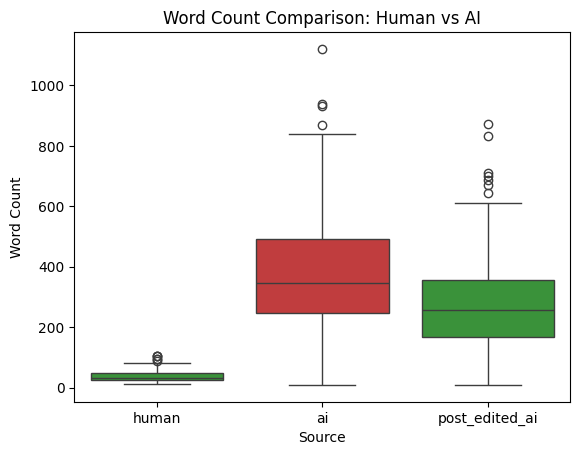

In [17]:
sns.boxplot(
    data=df,
    x='human_or_ai',
    y='word_count',
    palette=['#2ca02c', '#d62728']
)
plt.title('Word Count Comparison: Human vs AI')
plt.xlabel('Source')
plt.ylabel('Word Count')
plt.show()


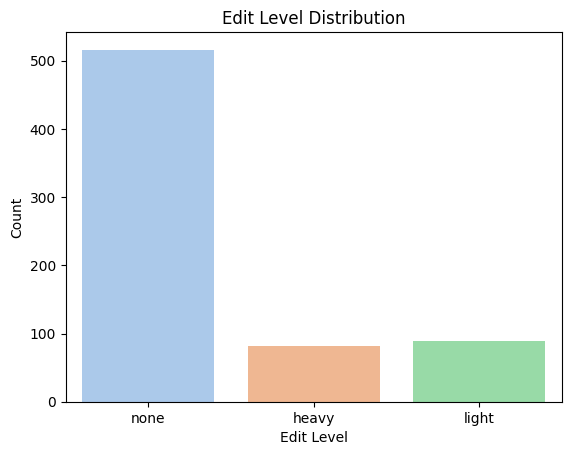

In [18]:
sns.countplot(
    data=df,
    x='edit_level',
    palette='pastel'
)
plt.title('Edit Level Distribution')
plt.xlabel('Edit Level')
plt.ylabel('Count')
plt.show()


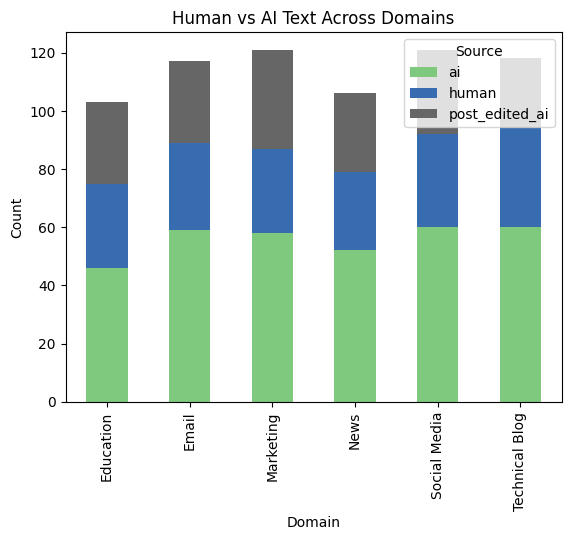

In [19]:
domain_ai = pd.crosstab(df['domain'], df['human_or_ai'])

domain_ai.plot(
    kind='bar',
    stacked=True,
    colormap='Accent'
)
plt.title('Human vs AI Text Across Domains')
plt.xlabel('Domain')
plt.ylabel('Count')
plt.legend(title='Source')
plt.show()


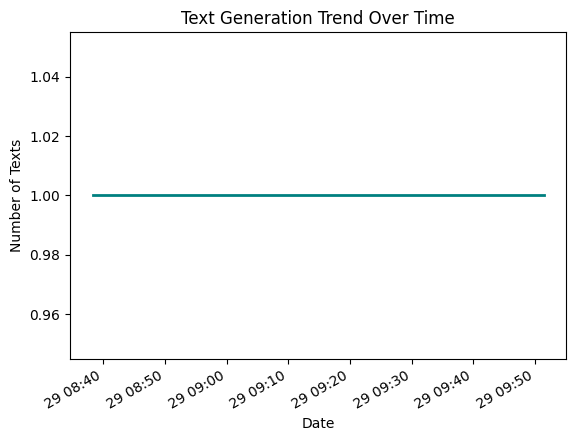

In [20]:
df['generation_date'] = pd.to_datetime(df['generation_date'])

df.groupby('generation_date').size().plot(
    color='teal',
    linewidth=2
)
plt.title('Text Generation Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Texts')
plt.show()


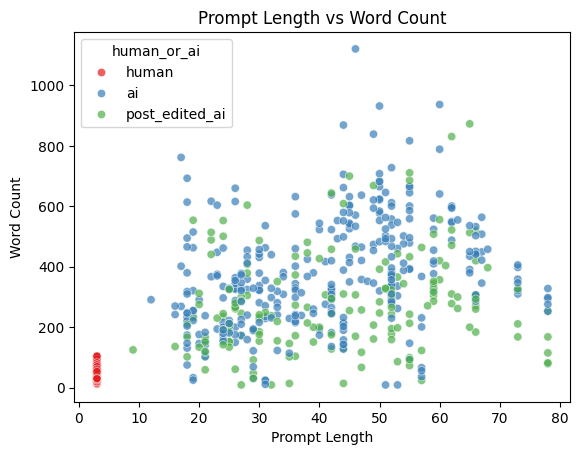

In [21]:
df['prompt_length'] = df['prompt'].astype(str).apply(len)

sns.scatterplot(
    data=df,
    x='prompt_length',
    y='word_count',
    hue='human_or_ai',
    palette='Set1',
    alpha=0.7
)
plt.title('Prompt Length vs Word Count')
plt.xlabel('Prompt Length')
plt.ylabel('Word Count')
plt.show()


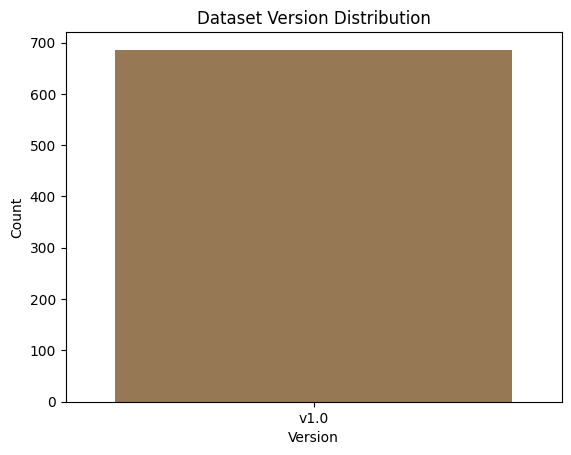

In [22]:
sns.countplot(
    data=df,
    x='version',
    palette='cubehelix'
)
plt.title('Dataset Version Distribution')
plt.xlabel('Version')
plt.ylabel('Count')
plt.show()


## feature engg

In [23]:
import re
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

# Optional: XGBoost
try:
    from xgboost import XGBClassifier
    xgb_available = True
except:
    xgb_available = False

sns.set(style="whitegrid")

In [24]:
df_clean = df.copy()
df_clean.dropna(subset=['text', 'human_or_ai'], inplace=True)

print("Dataset Shape:", df_clean.shape)

Dataset Shape: (686, 12)


In [25]:
df_feat = df_clean.copy()

df_feat['text_length'] = df_feat['text'].astype(str).apply(len)

df_feat['sentence_count'] = df_feat['text'].astype(str).apply(
    lambda x: len(re.split(r'[.!?]+', x))
)

df_feat['avg_word_length'] = df_feat['text'].astype(str).apply(
    lambda x: np.mean([len(w) for w in x.split()]) if len(x.split()) > 0 else 0
)

df_feat['uppercase_ratio'] = df_feat['text'].astype(str).apply(
    lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0
)

df_feat['punctuation_count'] = df_feat['text'].astype(str).apply(
    lambda x: sum(1 for c in x if c in '.,!?;:')
)

print("✅ Text features created")


✅ Text features created


In [26]:
label_encoders = {}

for col in ['domain', 'language', 'edit_level', 'source_model']:
    if col in df_feat.columns:
        le = LabelEncoder()
        df_feat[col + '_encoded'] = le.fit_transform(df_feat[col].astype(str))
        label_encoders[col] = le
        print(f"Encoded: {col}")


Encoded: domain
Encoded: language
Encoded: edit_level
Encoded: source_model


In [27]:
tfidf = TfidfVectorizer(
    max_features=5000,
    min_df=2,
    max_df=0.95,
    ngram_range=(1, 2),
    stop_words='english'
)

tfidf_matrix = tfidf.fit_transform(df_feat['text'].astype(str))

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=[f"tfidf_{i}" for i in range(tfidf_matrix.shape[1])]
)

print("TF-IDF Shape:", tfidf_df.shape)


TF-IDF Shape: (686, 5000)


In [28]:
numerical_features = [
    'word_count', 'text_length', 'sentence_count',
    'avg_word_length', 'uppercase_ratio', 'punctuation_count'
]

encoded_features = [c for c in df_feat.columns if c.endswith('_encoded')]

X_metadata = df_feat[numerical_features + encoded_features]

X = pd.concat(
    [X_metadata.reset_index(drop=True),
     tfidf_df.reset_index(drop=True)],
    axis=1
)

print("Total Features:", X.shape[1])


Total Features: 5010


In [29]:
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(df_feat['human_or_ai'])

class_mapping = dict(zip(target_encoder.classes_,
                         target_encoder.transform(target_encoder.classes_)))

print("Class Mapping:", class_mapping)


Class Mapping: {'ai': np.int64(0), 'human': np.int64(1), 'post_edited_ai': np.int64(2)}


In [30]:
assert X.isnull().sum().sum() == 0
assert np.isinf(X.select_dtypes(np.number)).sum().sum() == 0
assert len(X) == len(y)

print("✅ Data Quality Checks Passed")


✅ Data Quality Checks Passed


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [32]:
def evaluate_model(model, X_tr, X_te, y_tr, y_te, name):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)

    acc = accuracy_score(y_te, y_pred)
    f1 = f1_score(y_te, y_pred, average='weighted')

    print(f"\n{name}")
    print("Accuracy:", acc)
    print("F1 Score:", f1)
    print(confusion_matrix(y_te, y_pred))
    print(classification_report(y_te, y_pred))

    return acc, f1


In [33]:
lr = LogisticRegression(max_iter=2000, solver='saga', n_jobs=-1)
evaluate_model(lr, X_train, X_test, y_train, y_test, "Logistic Regression")



Logistic Regression
Accuracy: 0.6159420289855072
F1 Score: 0.525159942551247
[[66  1  0]
 [18 19  0]
 [34  0  0]]
              precision    recall  f1-score   support

           0       0.56      0.99      0.71        67
           1       0.95      0.51      0.67        37
           2       0.00      0.00      0.00        34

    accuracy                           0.62       138
   macro avg       0.50      0.50      0.46       138
weighted avg       0.53      0.62      0.53       138



(0.6159420289855072, 0.525159942551247)

In [34]:
scaler = MinMaxScaler()
X_train_nb = scaler.fit_transform(X_train)
X_test_nb = scaler.transform(X_test)

nb = MultinomialNB()
evaluate_model(nb, X_train_nb, X_test_nb, y_train, y_test, "Naive Bayes")



Naive Bayes
Accuracy: 0.6884057971014492
F1 Score: 0.68421867563744
[[48  2 17]
 [ 4 33  0]
 [16  4 14]]
              precision    recall  f1-score   support

           0       0.71      0.72      0.71        67
           1       0.85      0.89      0.87        37
           2       0.45      0.41      0.43        34

    accuracy                           0.69       138
   macro avg       0.67      0.67      0.67       138
weighted avg       0.68      0.69      0.68       138



(0.6884057971014492, 0.68421867563744)

In [35]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
evaluate_model(rf, X_train, X_test, y_train, y_test, "Random Forest")



Random Forest
Accuracy: 0.9130434782608695
F1 Score: 0.908566550058304
[[66  0  1]
 [ 0 37  0]
 [11  0 23]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92        67
           1       1.00      1.00      1.00        37
           2       0.96      0.68      0.79        34

    accuracy                           0.91       138
   macro avg       0.94      0.89      0.90       138
weighted avg       0.92      0.91      0.91       138



(0.9130434782608695, 0.908566550058304)

In [36]:
gb = GradientBoostingClassifier(random_state=42)
evaluate_model(gb, X_train, X_test, y_train, y_test, "Gradient Boosting")



Gradient Boosting
Accuracy: 1.0
F1 Score: 1.0
[[67  0  0]
 [ 0 37  0]
 [ 0  0 34]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        34

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



(1.0, 1.0)

In [37]:
if xgb_available:
    xgb = XGBClassifier(
        eval_metric='mlogloss',
        tree_method='hist',
        random_state=42
    )
    evaluate_model(xgb, X_train, X_test, y_train, y_test, "XGBoost")



XGBoost
Accuracy: 1.0
F1 Score: 1.0
[[67  0  0]
 [ 0 37  0]
 [ 0  0 34]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        34

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



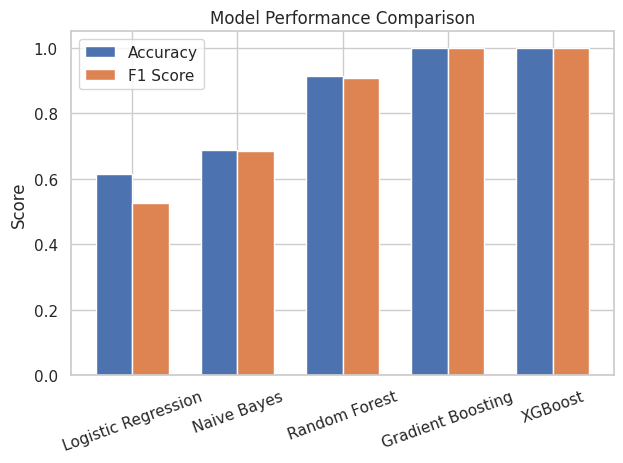

In [38]:
models = [
    "Logistic Regression",
    "Naive Bayes",
    "Random Forest",
    "Gradient Boosting",
    "XGBoost"
]

accuracy = [0.6159, 0.6884, 0.9130, 1.0, 1.0]
f1_score = [0.5251, 0.6842, 0.9085, 1.0, 1.0]

x = np.arange(len(models))
width = 0.35

plt.figure()
plt.bar(x - width/2, accuracy, width, label='Accuracy')
plt.bar(x + width/2, f1_score, width, label='F1 Score')

plt.xticks(x, models, rotation=20)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.tight_layout()
plt.show()


In [39]:
def plot_confusion_matrix(cm, model_name):
    plt.figure()
    plt.imshow(cm)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.colorbar()
    
    classes = [0, 1, 2]
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, cm[i, j], ha="center", va="center")

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()


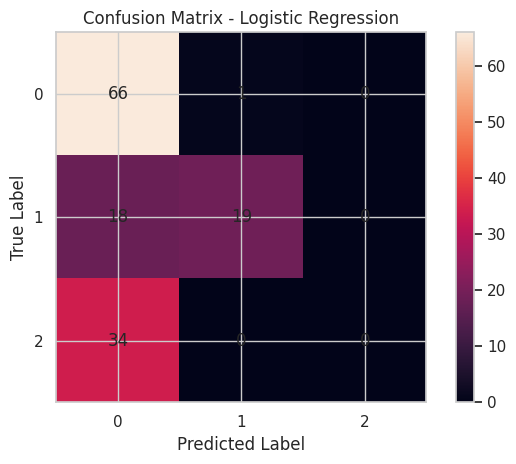

In [40]:
cm_lr = np.array([
    [66, 1, 0],
    [18, 19, 0],
    [34, 0, 0]
])
plot_confusion_matrix(cm_lr, "Logistic Regression")


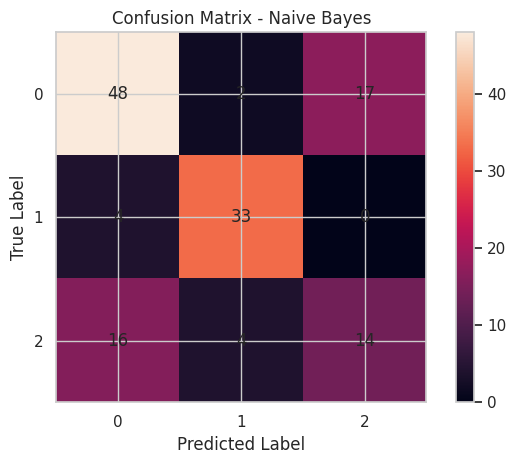

In [41]:
cm_nb = np.array([
    [48, 2, 17],
    [4, 33, 0],
    [16, 4, 14]
])
plot_confusion_matrix(cm_nb, "Naive Bayes")


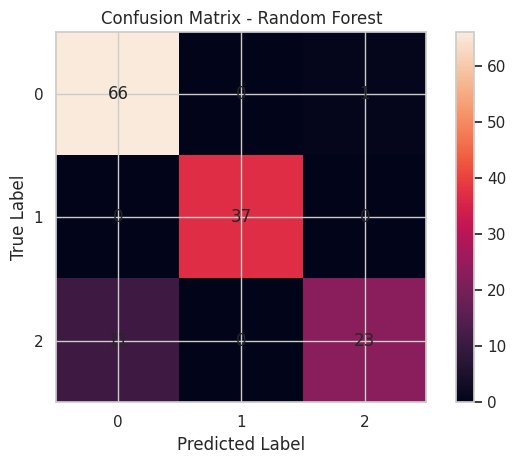

In [42]:
cm_rf = np.array([
    [66, 0, 1],
    [0, 37, 0],
    [11, 0, 23]
])
plot_confusion_matrix(cm_rf, "Random Forest")


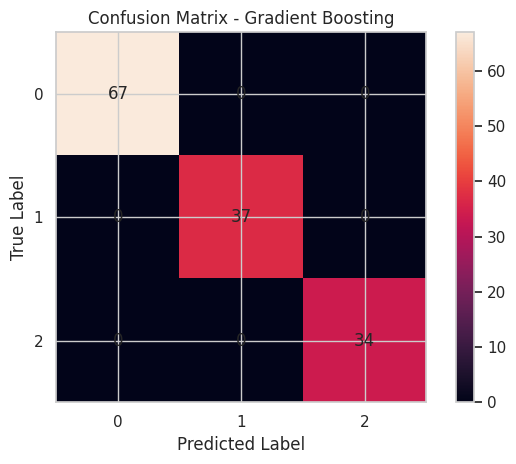

In [43]:
cm_gb = np.array([
    [67, 0, 0],
    [0, 37, 0],
    [0, 0, 34]
])
plot_confusion_matrix(cm_gb, "Gradient Boosting")


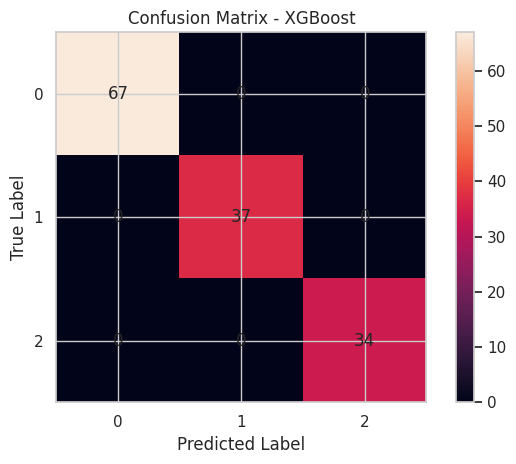

In [44]:
cm_xgb = np.array([
    [67, 0, 0],
    [0, 37, 0],
    [0, 0, 34]
])
plot_confusion_matrix(cm_xgb, "XGBoost")


## Thank you..pls upvote!!!!